# Pandas
The pandas library provides an amazingly rich set of tools for data inport, export, cleaning, and more. We will use it here for bringing in a large dataset of insect egg morphometrics that was recently preprinted in this [paper](https://www.biorxiv.org/content/early/2018/11/19/471953?rss=1). The authors have deposited the data into a convential [github repo](https://github.com/shchurch/Insect_Egg_Evolution) for people like us to play with. I've already gone ahead and downloaded the data to the repo for this class and put it within the notebooks directory

In [184]:
import pandas as pd
from pandas import Series, DataFrame


the two main data structes that pandas adds for us are `Series` and `DataFrame`. `Series` is a one dimensionsal array-like object that contains an array of data and an associated array of data labels, called its *index*. We can create a Series from a list of data

In [185]:
aSer = Series([4,3,8,-9])
aSer

0    4
1    3
2    8
3   -9
dtype: int64

the default behavior is to set the index for the observations we hand it from the integers 0 through n-1. We can query both the index and the values of our series


In [186]:
print(aSer.values)
print(aSer.index)

[ 4  3  8 -9]
RangeIndex(start=0, stop=4, step=1)


we can also manually set the index of our data if we so choose

In [187]:
aSer = Series([4,3,8,-9],index=['a','b','c','d'])
aSer

a    4
b    3
c    8
d   -9
dtype: int64

with this sort of index, we can get values out accordingly directly as well

In [189]:
#print(aSer['a'])
bSer = aSer[['a','c']]
print(bSer)
print(type(bSer))

a    4
c    8
dtype: int64
<class 'pandas.core.series.Series'>


Series are basically like dicts with a particular order enforced. Indeed it is trivial to go between a dict and a Series-- the keys from the dict are used for the index.

In [190]:
aDict = {'Brooklyn':1, 'Queens':3, 'The Bronx':4, 'Staten Island':5, 'Manhattan':2}
boroSeries = Series(aDict)
boroSeries

Brooklyn         1
Queens           3
The Bronx        4
Staten Island    5
Manhattan        2
dtype: int64

## DataFrames
Series are fine but what makes pandas useful is DataFrames. DataFrames represent spreadsheet-like data for us by containing an ordered collection of columns, each of which can be of it's own data type. DataFrames have an index on rows and columns, and are loosely a dict of Series.

We can quickly set up a small data frame to play with

In [191]:
data = {'boro':['Brooklyn', 'Queens', 'The Bronx', 'Staten Island', 'Manhattan'],
       'rank':[1,3,4,5,2],'popnSize':[2.639e06,2.359e06,1.471e06,4.79e05,1.665e06]}
df = DataFrame(data)
df

,boro,rank,popnSize
0,Brooklyn,1,2639000.0
1,Queens,3,2359000.0
2,The Bronx,4,1471000.0
3,Staten Island,5,479000.0
4,Manhattan,2,1665000.0


we can retrieve series from our dataframe in two ways

In [196]:
print(df['boro'])
#type(df['boro'])
#or the other way
print(df.popnSize)

0         Brooklyn
1           Queens
2        The Bronx
3    Staten Island
4        Manhattan
Name: boro, dtype: object
1722600.0


we can add new columns to our dataframe easily. for instance lets set up a new column asking if the population size of a boro is greater than 1 million residents

In [197]:
df['big'] = df.popnSize > 1e06
df

,boro,rank,popnSize,big
0,Brooklyn,1,2639000.0,True
1,Queens,3,2359000.0,True
2,The Bronx,4,1471000.0,True
3,Staten Island,5,479000.0,False
4,Manhattan,2,1665000.0,True


we can also set up a new column with a scalar

In [198]:
df['subway'] =1
df

,boro,rank,popnSize,big,subway
0,Brooklyn,1,2639000.0,True,1
1,Queens,3,2359000.0,True,1
2,The Bronx,4,1471000.0,True,1
3,Staten Island,5,479000.0,False,1
4,Manhattan,2,1665000.0,True,1


The whole point of using these data frames is that we can do stuff to them once we have data in a dataframe. For instance we can sort dataframes, merge them, edit them easily, etc. 

Here let's do a sort by rank of the boros

In [199]:
df_Sorted = df.sort_values(by='rank')
df_Sorted

,boro,rank,popnSize,big,subway
0,Brooklyn,1,2639000.0,True,1
4,Manhattan,2,1665000.0,True,1
1,Queens,3,2359000.0,True,1
2,The Bronx,4,1471000.0,True,1
3,Staten Island,5,479000.0,False,1


In [200]:
df.big.unique()

array([ True, False])

## Working with other peoples data with pandas
As an example dataset we will work with this rather large dataset of insect egg morphometrics. First we will import it and looks at the first 5 rows of data within it using the `head` function

In [201]:
#read dataset
df = pd.read_csv("egg_database.tsv",sep="\t")
#make a quick table of the first 5 lines
df.head()

,ID,bibtex,author,journal,year,family,superfamily,subfamily,suborder,order,...,X3,logX1,logX2,logX3,ar,el,vol,logar,logvol,group
0,7112,machida1981external,"Machida, Ryuichiro",Journal of Morphology,1981,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.113943,-0.096910,NaN,1.625000,0.625000,0.435634,0.210853,-0.360878,Apterygota
1,7113,machida1990early,"Machida, Ryuichiro and Nagashima, Takayuki and...",Journal of Morphology,1990,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.113943,-0.154902,NaN,1.857143,0.857143,0.333532,0.268845,-0.476862,Apterygota
2,7410,1990cleavage,"Ando, H and Machida, R and Nagashima, T",Bulletin of Seisen Women's Junior College,1990,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.113943,-0.154902,NaN,1.857143,0.857143,0.333532,0.268845,-0.476862,Apterygota
3,7086,larink1969entwicklungsgeschichte,"Larink, O",Helgol{ä}nder Wissenschaftliche Meeresuntersuc...,1969,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.000488,-0.163799,NaN,1.459779,0.459779,0.246541,0.164287,-0.608111,Apterygota
4,7292,roth1968oothecae,"Roth, Louis M",Annals of the Entomological Society of America,1968,Blaberidae,Blaberoidea,Blaberinae,NaN,Blattodea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polyneoptera


In [203]:
#lets look at the list of column names
#print("column names:")
#for c in list(df):
#    print(c)
#print("------------")
# now let's get unique orders of insects in db and their obs counts

print(df['order'].value_counts())


Lepidoptera         2949
Hymenoptera         1768
Hemiptera           1248
Diptera              979
Coleoptera           740
Orthoptera           613
Phasmatodea          501
Ephemeroptera        236
Blattodea            217
Plecoptera           181
Neuroptera           102
Odonata               78
Phthiraptera          47
Mecoptera             29
Trichoptera           28
Megaloptera           20
Siphonaptera          18
Psocoptera            17
Dermaptera            11
Thysanoptera          11
Zoraptera              8
Mantodea               7
Collembola             7
Strepsiptera           6
Grylloblattodea        5
Mantophasmatodea       5
Diplura                4
Archaeognatha          4
Protura                3
Raphidioptera          2
Zygentoma              2
Embioptera             2
Name: order, dtype: int64


so we have quickly gotten some interesting information out of this dataframe. Let's drill down a bit and examine the egg volume measurement. In particular let's look at the insect order level for differences in egg volume. 

In [204]:
df.groupby('order').vol.describe()

,count,mean,std,min,25%,50%,75%,max
order,,,,,,,,
Archaeognatha,4.0,0.337310,0.077320,2.465407e-01,0.311784,0.333532,0.359058,0.435634
Blattodea,82.0,1.836687,3.552705,1.267109e-02,0.090987,0.335046,1.538878,15.254969
Coleoptera,675.0,4.126014,27.457893,1.507964e-03,0.052353,0.222529,0.958792,466.526509
Collembola,6.0,0.362963,0.848774,9.047787e-04,0.002656,0.007247,0.051664,2.094787
Dermaptera,11.0,0.403375,0.321431,1.602212e-01,0.264143,0.292334,0.426162,1.327323
Diplura,4.0,0.018619,0.017186,1.257128e-04,0.005922,0.020420,0.033118,0.033510
Diptera,846.0,0.059402,0.179555,3.101341e-06,0.007116,0.021588,0.066796,3.392920
Embioptera,1.0,0.130900,NaN,1.308997e-01,0.130900,0.130900,0.130900,0.130900
Ephemeroptera,222.0,0.004020,0.020255,1.425498e-04,0.000827,0.001207,0.002402,0.271117


### Visualize differences 
Next we we visualize the distribution of egg volumes between the two best sampled insect orders, Lepidoptera (butterflies and moths) and Hymenoptera (bees, wasps, ants). To do this we will use a histogram that pandas itself produces. 

[Text(0, 0.5, 'count'), Text(0.5, 0, 'log(egg volume)')]

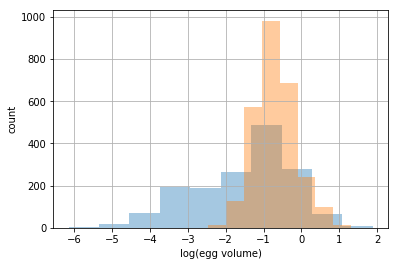

In [205]:
#pull out the two most common order in the dataset
both = df.loc[(df['order'] == "Lepidoptera") | (df['order'] =="Hymenoptera")]
#plot histogram of the log(egg_volume)
h = both.groupby('order').logvol.hist(alpha=0.4)
h[0].set(xlabel="log(egg volume)",ylabel="count")

/Users/adk/miniconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adk/miniconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

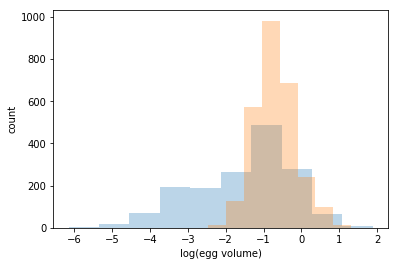

In [206]:
# lets try the same thing with straight matplotlib
h1 = plt.hist(both[both.order=="Hymenoptera"].logvol,alpha=0.3)
h2 = plt.hist(both[both.order=="Lepidoptera"].logvol,alpha=0.3)
plt.xlabel("log(egg volume)")
plt.ylabel("count")


In [ ]:
#now do a test for difference between two means
hym = df.loc[df['order'] == "Hymenoptera"]
lep = df.loc[df['order'] == "Lepidoptera"]
print(sp.stats.mannwhitneyu(lep.logvol,hym.logvol))